In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

1.2.

In [2]:
def lbg(img,n,N):
  img = img.reshape(img.shape[0]//n,n,-1,n).swapaxes(1,2).reshape(-1,n*n).astype(int)
  img_s = np.unique(img,axis=0)
  center = img_s[np.random.choice(img_s.shape[0], size=N, replace=False)]
  for i in range(8):
    center = center[:, np.newaxis]
    dist = np.sqrt(((img_s - center)**2).sum(axis=2))
    group = dist.argmin(axis=0)
    center = np.array([img_s[group==i].mean(axis=0) for i in range(N)])
  return center,img

def vqEn(codebook,vect):
  dist = ((vect-codebook[:,None,:])**2).sum(axis=2)
  index = dist.argmin(axis=0).reshape(int(np.sqrt(vect.shape[0])),-1)
  return index

def vqDe(codebook,ind):
  return codebook[ind].astype(int)

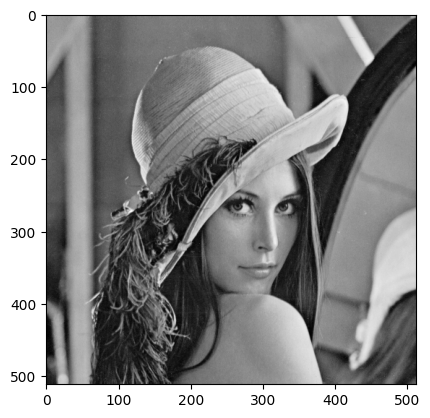

In [4]:
img = plt.imread('Lena_Gray.tiff')
plt.imshow(img, cmap='gray')
plt.show()

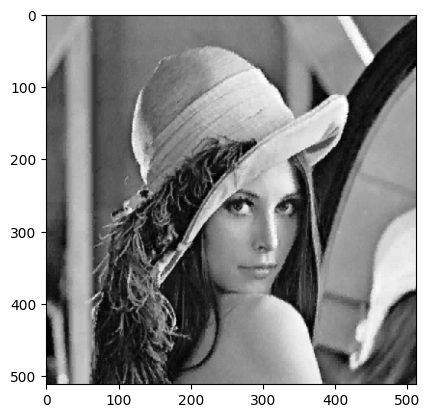

In [5]:
codebook,imgC = lbg(img,4,256)
ind = vqEn(codebook,imgC)
vect = vqDe(codebook,ind)
img_compression = vect.reshape(128,128,4,4).swapaxes(1,2).reshape(512,512)
plt.imshow(img_compression, cmap='gray')
plt.show()

In [6]:
MSE = 0.0
for i in range(len(img)):
  for j in range(len(img[i])):
    MSE += (img[i][j]-img_compression[i][j])**2
MSE *= 1/img.size
PSNR = 10*math.log(255**2/MSE, 10)
PSNR

31.411100877228478

In [7]:
codebook,imgC = lbg(img,8,256)
ind = vqEn(codebook,imgC)
vect = vqDe(codebook,ind)

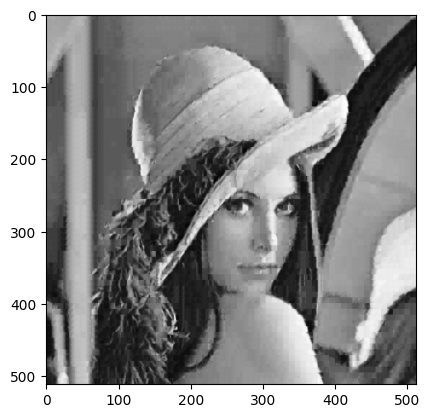

In [8]:
img_compression = vect.reshape(64,64,8,8).swapaxes(1,2).reshape(512,512)
plt.imshow(img_compression, cmap='gray')
plt.show()

In [9]:
MSE = 0.0
for i in range(len(img)):
  for j in range(len(img[i])):
    MSE += (img[i][j]-img_compression[i][j])**2
MSE *= 1/img.size
PSNR = 10*math.log(255**2/MSE, 10)
PSNR

28.354128080397057

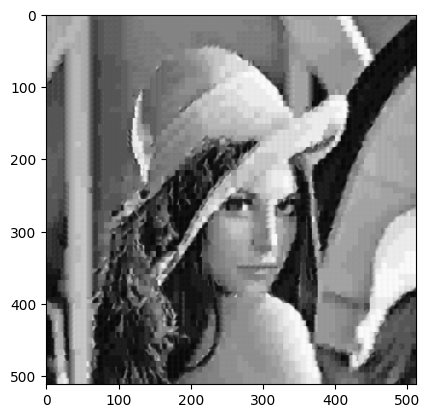

In [10]:
codebook,imgC = lbg(img,8,64)
ind = vqEn(codebook,imgC)
vect = vqDe(codebook,ind)
img_compression = vect.reshape(64,64,8,8).swapaxes(1,2).reshape(512,512)
plt.imshow(img_compression, cmap='gray')
plt.show()

In [11]:
MSE = 0.0
for i in range(len(img)):
  for j in range(len(img[i])):
    MSE += (img[i][j]-img_compression[i][j])**2
MSE *= 1/img.size
PSNR = 10*math.log(255**2/MSE, 10)
PSNR

26.477137776081396

3.4.

In [12]:
def lbg(img,n,N):
  img = img.reshape(img.shape[0]//n,n,-1,n,3).swapaxes(1,2).reshape(-1,n*n*3).astype(float)
  img_s = np.unique(img,axis=0)
  center = img_s[np.random.choice(img_s.shape[0], size=N, replace=False)]
  for i in range(8):
    center = center[:, np.newaxis]
    dist = np.sqrt(((img_s - center)**2).sum(axis=2))
    group = dist.argmin(axis=0)
    center = np.array([img_s[group==i].mean(axis=0) for i in range(N)])
  return center,img

def vqEn(codebook,vect):
  dist = ((vect-codebook[:,None,:])**2).sum(axis=2)
  index = dist.argmin(axis=0)
  return index

def vqDe(codebook,ind):
  return codebook[ind]

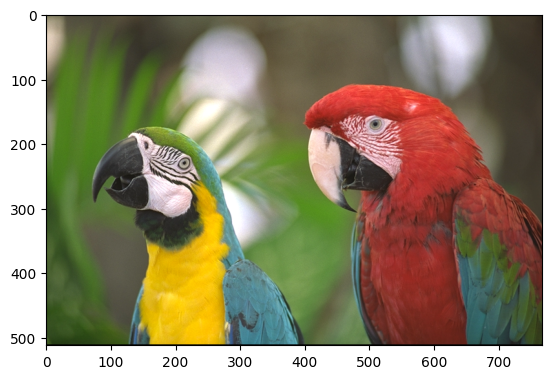

In [13]:
img_5 = plt.imread('kodim23.png')
plt.imshow(img_5)
plt.show()

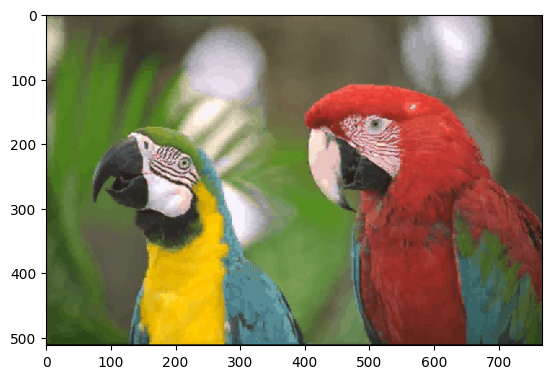

In [14]:
codebook,imgC = lbg(img_5,4,256)
ind = vqEn(codebook,imgC).reshape(128,192)
vect = vqDe(codebook,ind)
img_compression = vect.reshape(128,192,4,4,3).swapaxes(1,2).reshape(512,768,3)
plt.imshow(img_compression)
plt.show()

In [15]:
MSE = 1.0
for i in range(img_5.shape[0]):
    for j in range(img_5.shape[1]):
        for k in range(img_5.shape[2]):
            MSE += (img_5[i, j, k] - img_compression[i, j, k])**2
MSE *= 1/img_5.size
PSNR = 10*math.log(255**2/MSE, 10)
PSNR

77.46522128049963

In [16]:
codebook,imgC = lbg(img_5,8,256)
ind = vqEn(codebook,imgC).reshape(64,96)
vect = vqDe(codebook,ind)

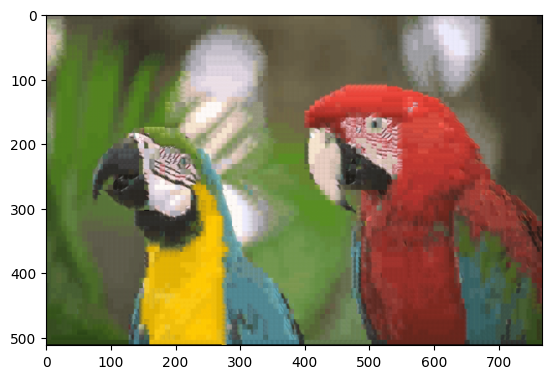

In [17]:
img_compression = vect.reshape(64,96,8,8,3).swapaxes(1,2).reshape(512,768,3)
plt.imshow(img_compression)
plt.show()

In [18]:
MSE = 1.0
for i in range(img_5.shape[0]):
    for j in range(img_5.shape[1]):
        for k in range(img_5.shape[2]):
            MSE += (img_5[i, j, k] - img_compression[i, j, k])**2
MSE *= 1/img_5.size
PSNR = 10*math.log(255**2/MSE, 10)
PSNR

75.2574493603063

In [19]:
codebook,imgC = lbg(img_5,8,64)
ind = vqEn(codebook,imgC).reshape(64,96)
vect = vqDe(codebook,ind)

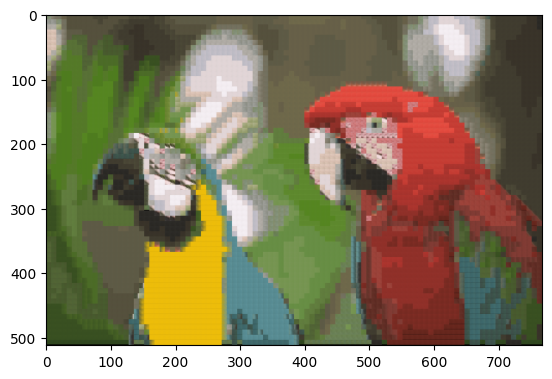

In [20]:
img_compression = vect.reshape(64,96,8,8,3).swapaxes(1,2).reshape(512,768,3)
plt.imshow(img_compression)
plt.show()

In [21]:
MSE = 1.0
for i in range(img_5.shape[0]):
    for j in range(img_5.shape[1]):
        for k in range(img_5.shape[2]):
            MSE += (img_5[i, j, k] - img_compression[i, j, k])**2
MSE *= 1/img_5.size
PSNR = 10*math.log(255**2/MSE, 10)
PSNR

73.00176054136504